# `mlarena.utils.plot_utils` Demo

This notebook serves as a demonstration of the various plotting utilities available in the `mlarena.utils.plot_utils` module. 

In [1]:
import mlarena.utils.plot_utils as put
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# 1. plot_box_scatter()

The `plot_box_scatter()` function creates a boxplot overlaid with scatter points, providing a detailed view of data distribution and outliers. 

It is useful for visualizing the spread, central tendency, and outliers of data across categories, especially when dealing with dense or overlapping data points.

In the demo below, you will see two examples: one with sparse data, and the another with more dense data, demonstrating how the function handles crowded datasets effectively.

## 1.1 Color the box and points by category

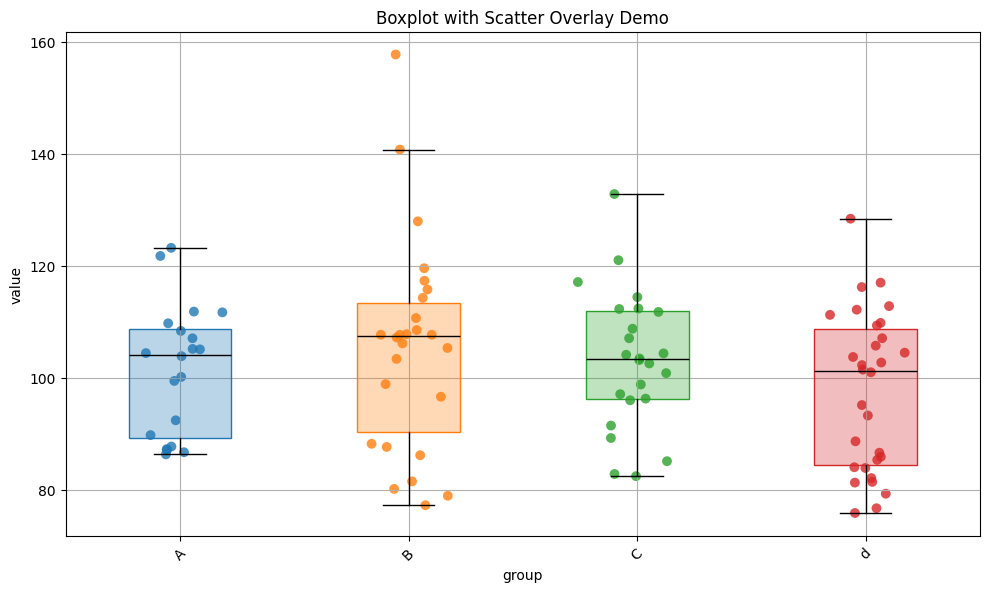

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
# Create synthetic data that is relatively sparse
n = 100
df = pd.DataFrame({
    "group": np.random.choice(["A", "B", "C", "d"], size=n),
    "source": np.random.choice(["Online", "Offline"], p= [0.2, 0.8], size=n),
    "value": np.random.normal(loc=100, scale=15, size=n)
})
# Create boxplot with scatter overlay
fig, ax, summary_table = put.plot_box_scatter(
    data=df,
    x="group",
    y="value",
    title="Boxplot with Scatter Overlay Demo",
    return_summary=True #return the summary stats, default to be False
)
ax.tick_params(axis='x', labelrotation=45)

In [3]:
summary_table

,group,n,mean,median,sd
0,A,20,101.490991,104.176506,11.594532
1,B,26,105.455240,107.471938,18.866255
2,C,24,103.175866,103.347606,12.284233
3,d,30,97.534952,101.261608,14.144729


## 1.2 Color the points by `point_hue`

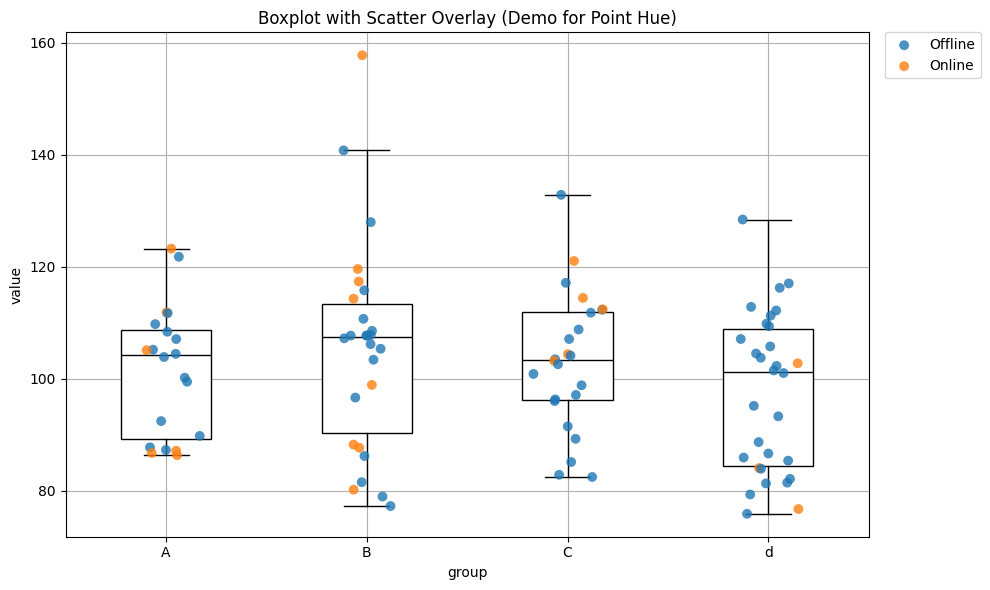

In [4]:
fig, ax = put.plot_box_scatter(
    data=df,
    x="group",
    y="value",
    point_hue="source",
    title="Boxplot with Scatter Overlay (Demo for Point Hue)",
)

## 1.3 Single color option

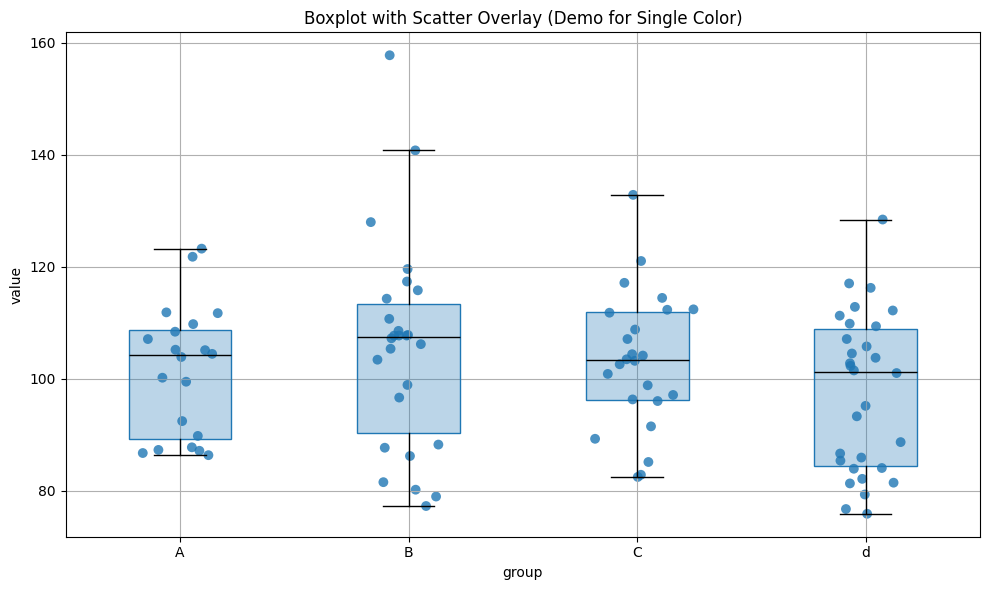

In [5]:
fig, ax = put.plot_box_scatter(
    data=df,
    x="group",
    y="value",
    single_color_box=True,
    title="Boxplot with Scatter Overlay (Demo for Single Color)",
)

## 1.4 Plot very dense data
Below is an example of a denser dataset. You can adjust the `dot_size` parameter to customize the visualization to your preference.

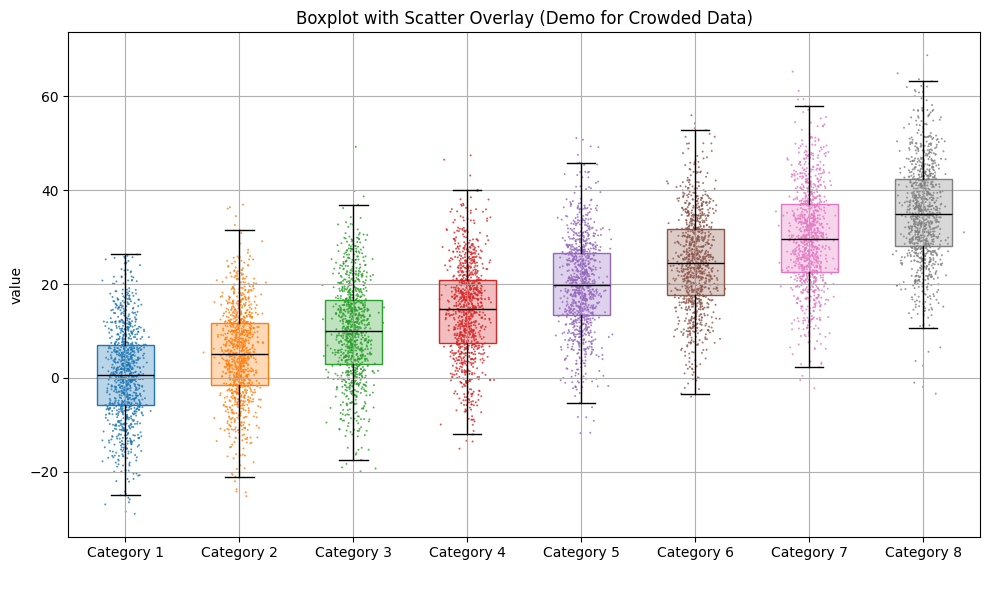

In [6]:
# Create synthetic data that is crowded
num_categories = 8
num_points_per_category = 1000
categories = [f"Category {i + 1}" for i in range(num_categories)]
values = np.concatenate(
    [
        np.random.normal(loc=i * 5, scale=10, size=num_points_per_category)
        for i in range(num_categories)
    ]
)
df_synthetic = pd.DataFrame(
    {"item": np.repeat(categories, num_points_per_category), "value": values}
)
# Create boxplot with scatter overlay
fig, ax = put.plot_box_scatter(
    data=df_synthetic,
    x="item",
    y="value",
    title="Boxplot with Scatter Overlay (Demo for Crowded Data)",
    point_size=2,
    xlabel=" "
    )


# 2. plot_metric_event_over_time()

The `plot_metric_event_over_time` function visualizes time-series data with event markers. It's perfect for tracking metrics over time while highlighting important events that might have influenced those metrics.

🔍 Key features:
- Plot multiple metrics on the same timeline with automatic dual y-axis support
- Mark important events with vertical lines and customizable labels
- Smart date formatting that adapts to your data's time range
- Extensive customization options for event styling and label positioning
- Works well with various time scales from hours to years

This function is particularly useful for analyzing the impact of interventions, treatments, or significant events on measured metrics over time.



## 2.1 Example 1: Health metrics and treatments

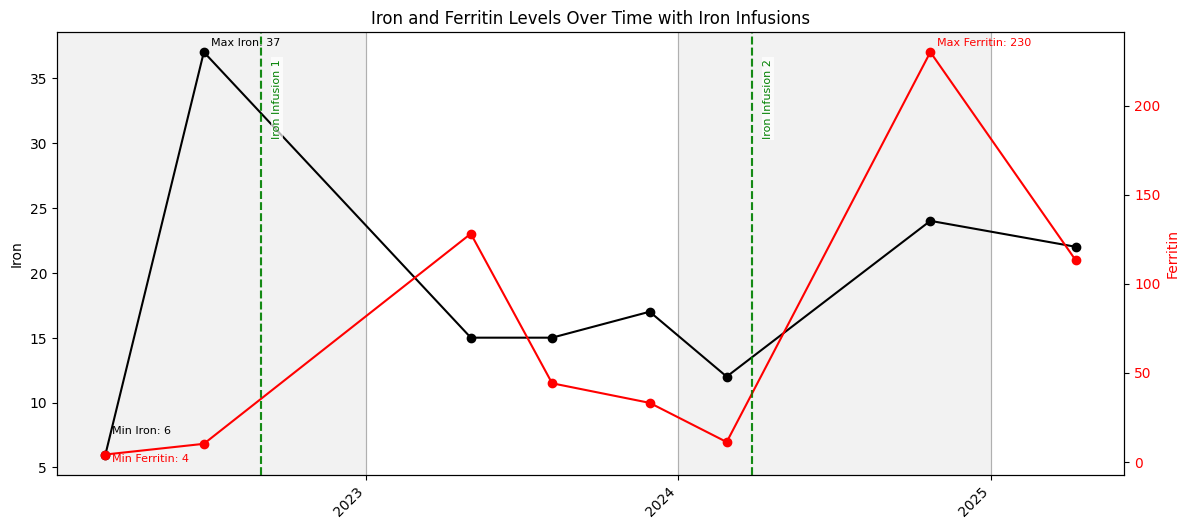

In [24]:
# Example usage:
data = pd.DataFrame(
    {
        "date": [
            "2022-03-03",
            "2022-06-26",
            "2023-05-04",
            "2023-08-07",
            "2023-11-29",
            "2024-02-27",
            "2024-10-22",
            "2025-04-10",
        ],
        "iron": [6, 37, 15, 15, 17, 12, 24, 22],
        "ferritin": [4, 10, 128, 44, 33, 11, 230, 113],
    }
)

metrics = {
    "Iron": {
        "values": "iron",
        #  "color": "blue" 
    },
    "Ferritin": {
        "values": "ferritin",
        #  "color": "darkred" 
    },
}

treatments = {"Iron Infusion": ["2022-09-01", "2024-03-28"]}

fig, axes = put.plot_metric_event_over_time(
    data=data,
    x="date",
    metrics=metrics,
    event_dates=treatments,
    title="Iron and Ferritin Levels Over Time with Iron Infusions",
    event_label_x_offset=0.01,
    event_label_y_pos=0.85
)


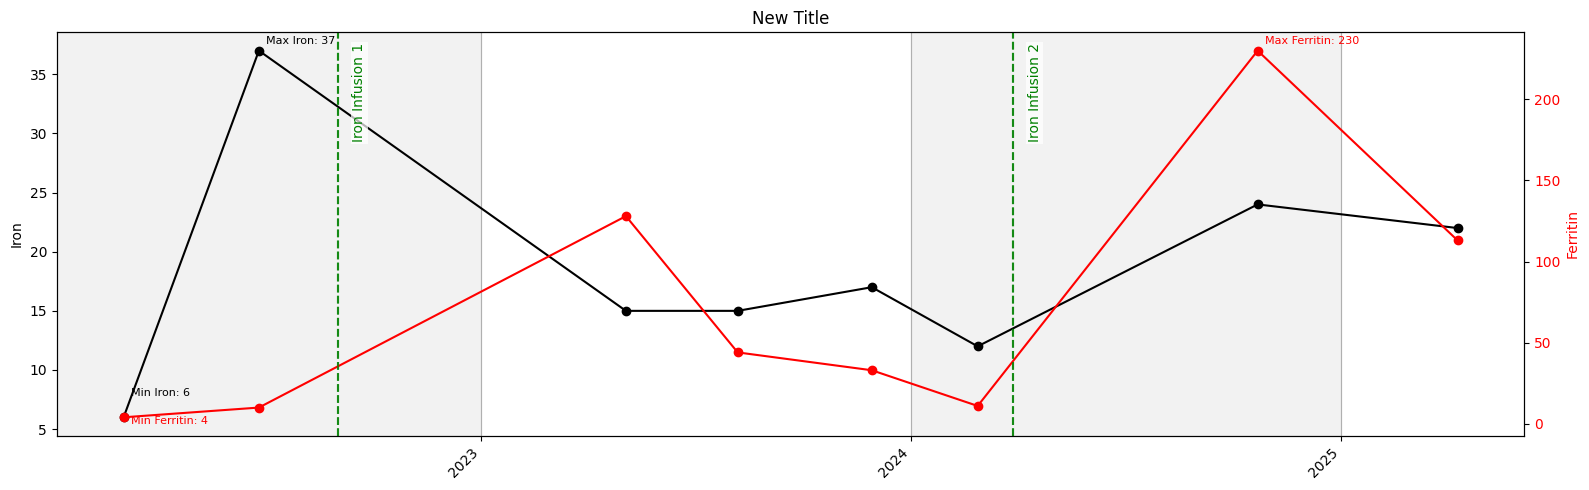

In [27]:
# further customize the figure if desired
fig, axes = put.plot_metric_event_over_time(
    data=data,
    x="date",
    metrics=metrics,
    event_dates=treatments,
    title = "Iron and Ferritin Levels Over Time with Iron Infusions",
    event_label_x_offset=0.01,
    event_label_fontsize=10
)

axes[1].set_title("New Title")
fig.set_size_inches(16, 5)
fig.tight_layout()
# fig.savefig('medical_plot.png', dpi=300, bbox_inches='tight')
plt.show() 


## 2.2 Example 2: Financial metrics and market events

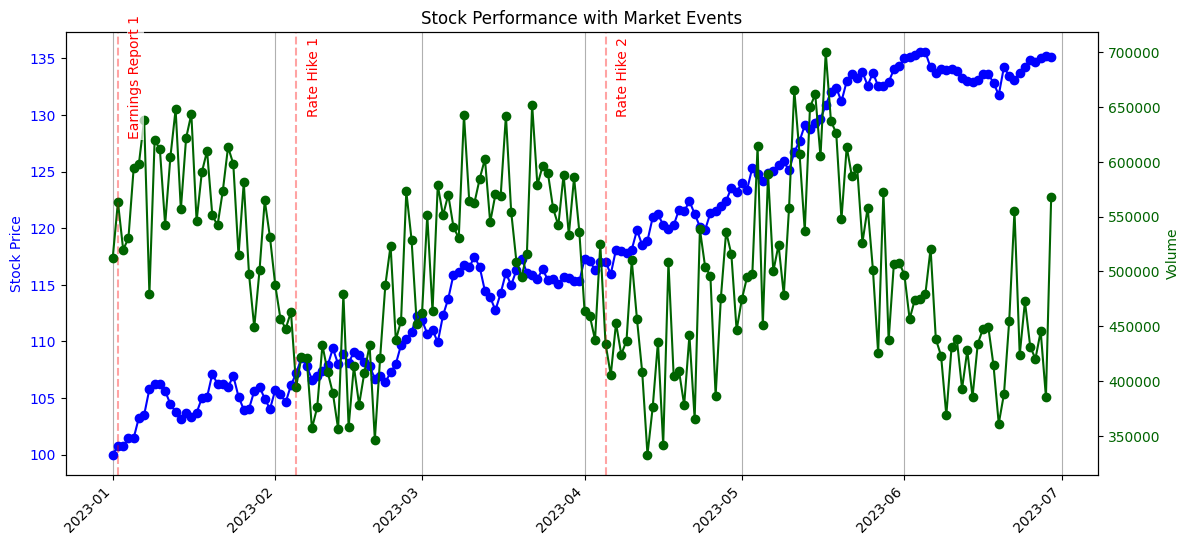

In [9]:
# Generate dates (daily data for 2 months)
months = 6
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(30 * months)]

# Generate stock price with trend and some volatility
initial_price = 100
trend = np.linspace(0, 30, len(dates))
volatility = np.random.normal(0, 3, len(dates))
stock_price = initial_price + trend + np.cumsum(volatility) * 0.3

# Generate trading volume with some pattern
base_volume = 500000
volume_trend = np.sin(np.linspace(0, 6*np.pi, len(dates))) * 100000
volume = base_volume + volume_trend + np.random.normal(0, 50000, len(dates))
volume = np.abs(volume)  

# Create DataFrame
finance_data = pd.DataFrame({
    'date': dates,
    'stock_price': stock_price,
    'trading_volume': volume
})

# Define market events
market_events = {
    'Rate Hike': ['2023-02-05','2023-04-05'], 
    'Earnings Report': ['2023-01-02'] 
}

# Plot the data
metrics = {
    'Stock Price': {'values': 'stock_price', 'color': 'blue'},
    'Volume': {'values': 'trading_volume', 'color': 'darkgreen'}
}

fig, axes = put.plot_metric_event_over_time(
    data=finance_data,
    x='date',
    metrics=metrics,
    event_dates=market_events,
    title="Stock Performance with Market Events",
    show_minmax=False,
    event_line_color="red",
    event_label_fontsize=10,
    event_label_color="red", 
    event_line_alpha=0.2,
    event_label_x_offset=0.01,
    event_label_y_pos=0.9,
    event_label_background=True
)

# plt.savefig('financial_metrics_events.png')
plt.show()

## 2.3 Auto-detection of X-axis time unit labels based on date range

This function intelligently formats date labels based on the timespan of your data, it displays:

- hourly format for short spans (≤3 days) 
- daily format for medium spans (≤60 days)
- monthly format for longer spans (≤1 year)
- quarterly format for multi-year data (≤3 years)
- yearly format for the longest timespans (>3 years)

Also, manual override with the `date_format` parameter is supported when needed. In the example below, when the date range is 60 days, the x-axis date label automatically switched to days. ⏱


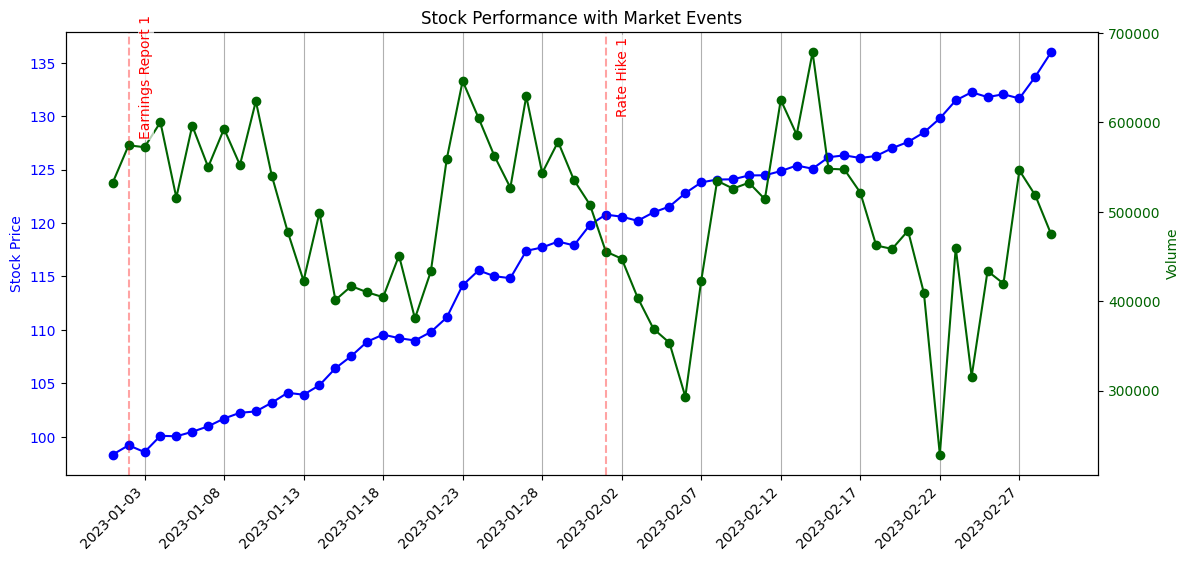

In [22]:
# Generate dates (daily data for 2 months)
months = 2
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(30 * months)]

# Generate stock price with trend and some volatility
initial_price = 100
trend = np.linspace(0, 30, len(dates))
volatility = np.random.normal(0, 3, len(dates))
stock_price = initial_price + trend + np.cumsum(volatility) * 0.3

# Generate trading volume with some pattern
base_volume = 500000
volume_trend = np.sin(np.linspace(0, 6*np.pi, len(dates))) * 100000
volume = base_volume + volume_trend + np.random.normal(0, 50000, len(dates))
volume = np.abs(volume)  

# Create DataFrame
finance_data = pd.DataFrame({
    'date': dates,
    'stock_price': stock_price,
    'trading_volume': volume
})

# Define market events
market_events = {
    'Rate Hike': ['2023-02-01'], 
    'Earnings Report': ['2023-01-02'] 
}

# Plot the data
metrics = {
    'Stock Price': {'values': 'stock_price', 'color': 'blue'},
    'Volume': {'values': 'trading_volume', 'color': 'darkgreen'}
}

fig, axes = put.plot_metric_event_over_time(
    data=finance_data,
    x='date',
    metrics=metrics,
    event_dates=market_events,
    title="Stock Performance with Market Events",
    show_minmax=False,
    event_line_color="red",
    event_label_fontsize=10,
    event_label_color="red", 
    event_line_alpha=0.2,
    event_label_x_offset=0.01,
    event_label_y_pos=0.9,
    event_label_background=True
)

plt.show()

# 3. plot_stacked_bar_over_time()

# The `plot_stacked_bar_over_time()` function visualizes categorical data distribution over time. It creates stacked bar charts showing how different categories (like "Yes"/"No" or product types) are distributed across time periods. The function can display either raw counts or percentages, making it useful for analyzing trends in categorical data over time. Common applications include visualizing fraud rates, customer response distributions, or product mix changes across different time periods.


In [11]:
# Create synthetic data
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="ME")
categories = ['Yes', 'No']
data = []

for date in dates:
    n = np.random.randint(50, 150)
    for _ in range(n):
        data.append({
            'end_date': date,
            'isFraud': np.random.choice(categories, p=[0.3, 0.7])  # 30% fraud, 70% not
        })

# Convert to DataFrame
df_synthetic = pd.DataFrame(data)

# Preview
print(df_synthetic.head())

    end_date isFraud
0 2023-01-31     Yes
1 2023-01-31      No
2 2023-01-31     Yes
3 2023-01-31     Yes
4 2023-01-31      No


### 3.1 Stacked bar showing percentage

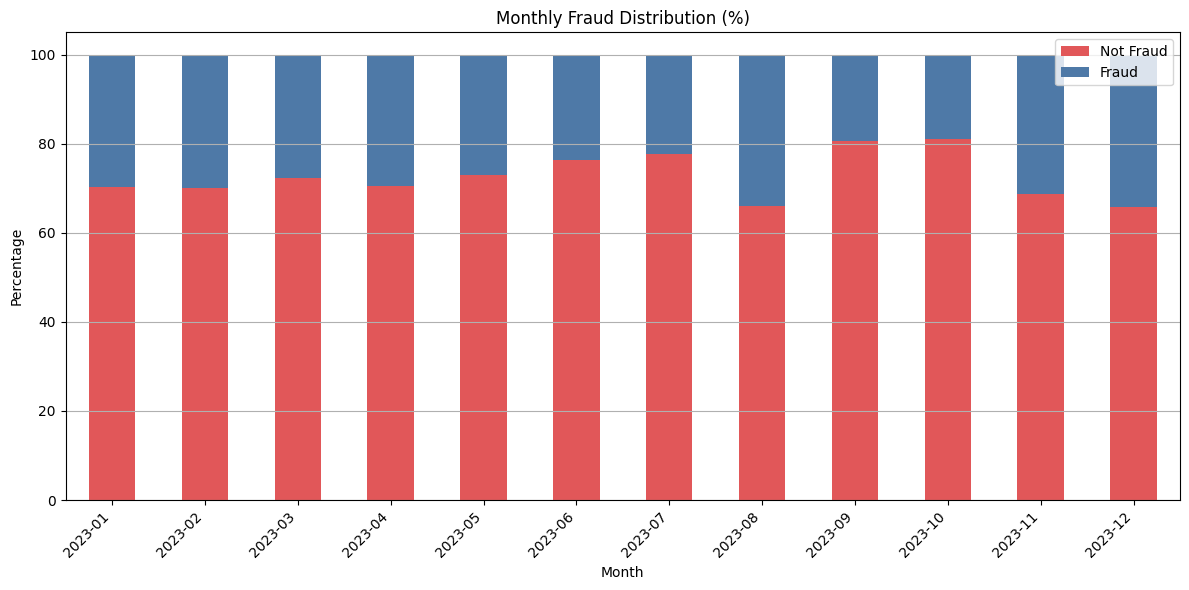

In [12]:
fig, ax = put.plot_stacked_bar_over_time(
    data=df_synthetic,
    x='end_date',
    y='isFraud',
    is_pct=True,
    label_dict={'Yes': 'Fraud', 'No': 'Not Fraud'},
    title='Monthly Fraud Distribution (%)',
    xlabel='',
    color_palette=['#E15759', '#4E79A7'] # CoralRed, SteelBlue
)
plt.show()

### 3.2 Stached bar showing actual counts

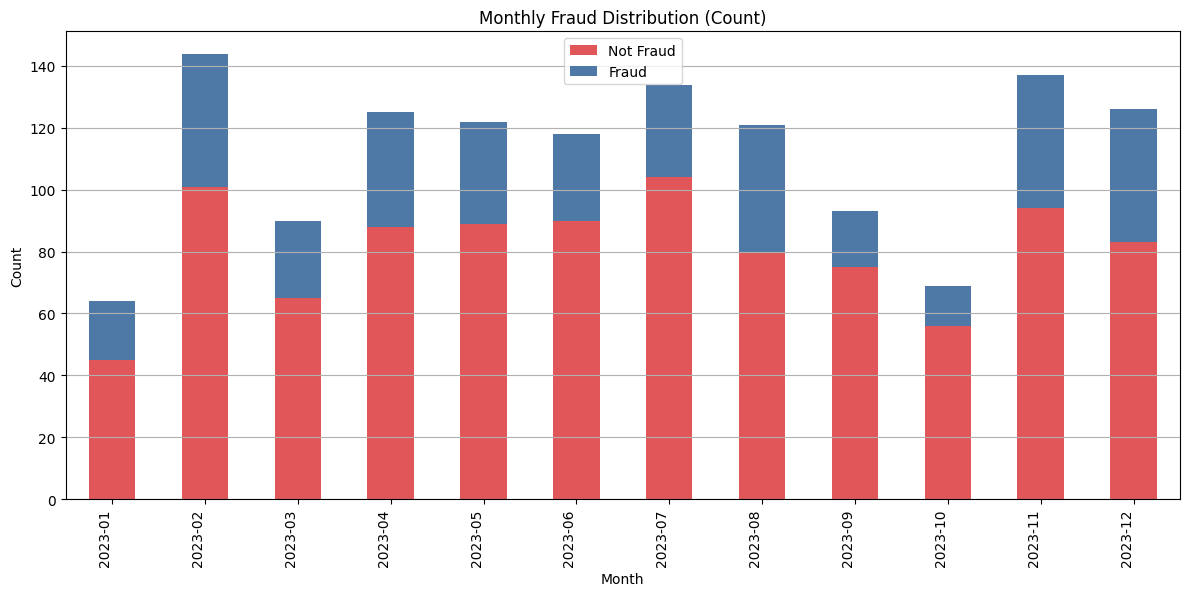

In [13]:
fig, ax = put.plot_stacked_bar_over_time(
    data=df_synthetic,
    x='end_date',
    y='isFraud',
    is_pct=False,
    label_dict={'Yes': 'Fraud', 'No': 'Not Fraud'},
    title='Monthly Fraud Distribution (Count)',
    xlabel='',
    color_palette=['#E15759', '#4E79A7'] 
)
ax.tick_params(axis='x', labelrotation=90)

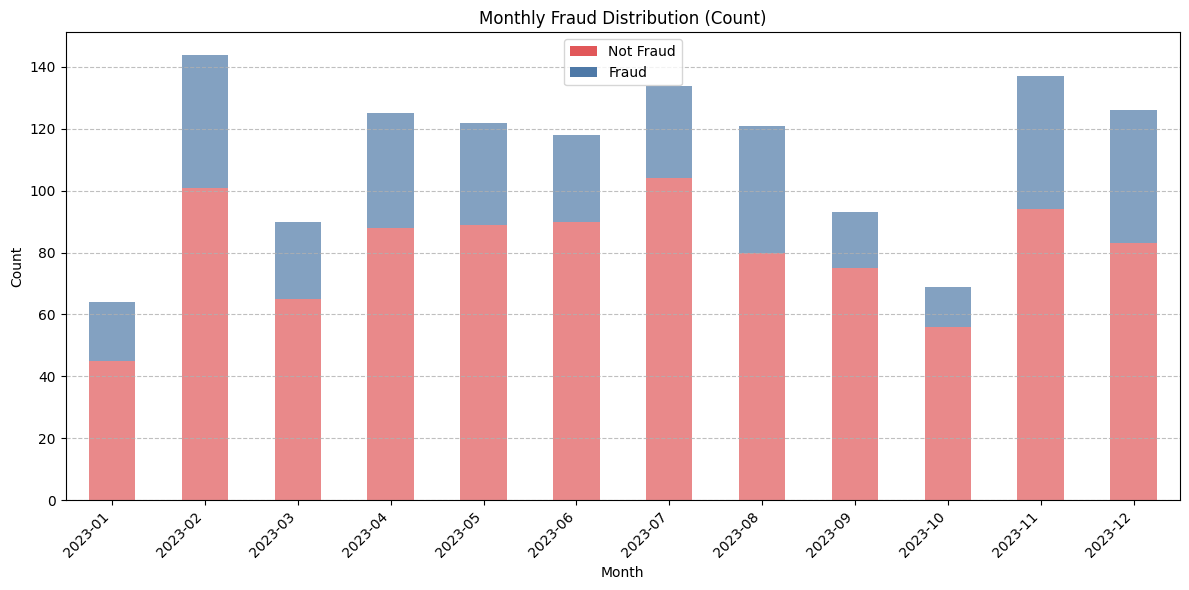

In [14]:
fig, ax = put.plot_stacked_bar_over_time(
    data=df_synthetic,
    x='end_date',
    y='isFraud',
    is_pct=False,
    label_dict={'Yes': 'Fraud', 'No': 'Not Fraud'},
    title='Monthly Fraud Distribution (Count)',
    xlabel='',
    color_palette=['#E15759', '#4E79A7'] 
)

# Customize grid style to be dashed with alpha
ax.grid(True, axis="y", linestyle='--', alpha=0.8)
# Customize bar transparency
for container in ax.containers:
    for bar in container:
        bar.set_alpha(0.7)  

### 3.3 Set time gratularity to the hour

Use the `freq` parameter to determine the time gratularity for the plot: 
- 'H'=hour
- 'D'=day
- 'M'=month
- 'Y'=year

In [15]:
# Define activity patterns
activity_patterns = {
    'business': {
        'hours': (9, 17),
        'activities': ['Work', 'Meeting', 'Break'],
        'probs': [0.6, 0.3, 0.1]
    },
    'evening': {
        'hours': (18, 22),
        'activities': ['Leisure', 'Dinner', 'Exercise'],
        'probs': [0.5, 0.3, 0.2]
    },
    'night': {
        'hours': (0, 8),
        'activities': ['Sleep', 'Reading', 'Other'],
        'probs': [0.7, 0.2, 0.1]
    }
}

# Generate data
dates = pd.date_range(start='2024-01-01', end='2024-01-01 23:00:00', freq='h')
n_points = len(dates)

# Generate activities
all_activities = []
all_timestamps = []

for hour in dates:
    current_hour = hour.hour
    
    # Determine pattern based on hour
    pattern = next(
        (p for p in activity_patterns.values() 
         if p['hours'][0] <= current_hour <= p['hours'][1]),
        activity_patterns['night']  # default to night pattern
    )
    
    # More activities during business hours, fewer at night
    if 9 <= current_hour <= 17:
        activities_per_hour = np.random.randint(15, 25)  # Busy during work hours
    elif 18 <= current_hour <= 22:
        activities_per_hour = np.random.randint(8, 15)   # Moderate evening activity
    else:
        activities_per_hour = np.random.randint(3, 8)    # Fewer activities at night
    
    # Generate multiple activities for this hour
    hour_activities = np.random.choice(
        pattern['activities'],
        size=activities_per_hour,
        p=pattern['probs']
    )
    
    all_activities.extend(hour_activities)
    all_timestamps.extend([hour] * activities_per_hour)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': all_timestamps,
    'activity': all_activities
})

print(df['activity'].value_counts())

activity
Work        98
Meeting     56
Sleep       34
Leisure     30
Break       17
Dinner      17
Reading     11
Other        6
Exercise     6
Name: count, dtype: int64


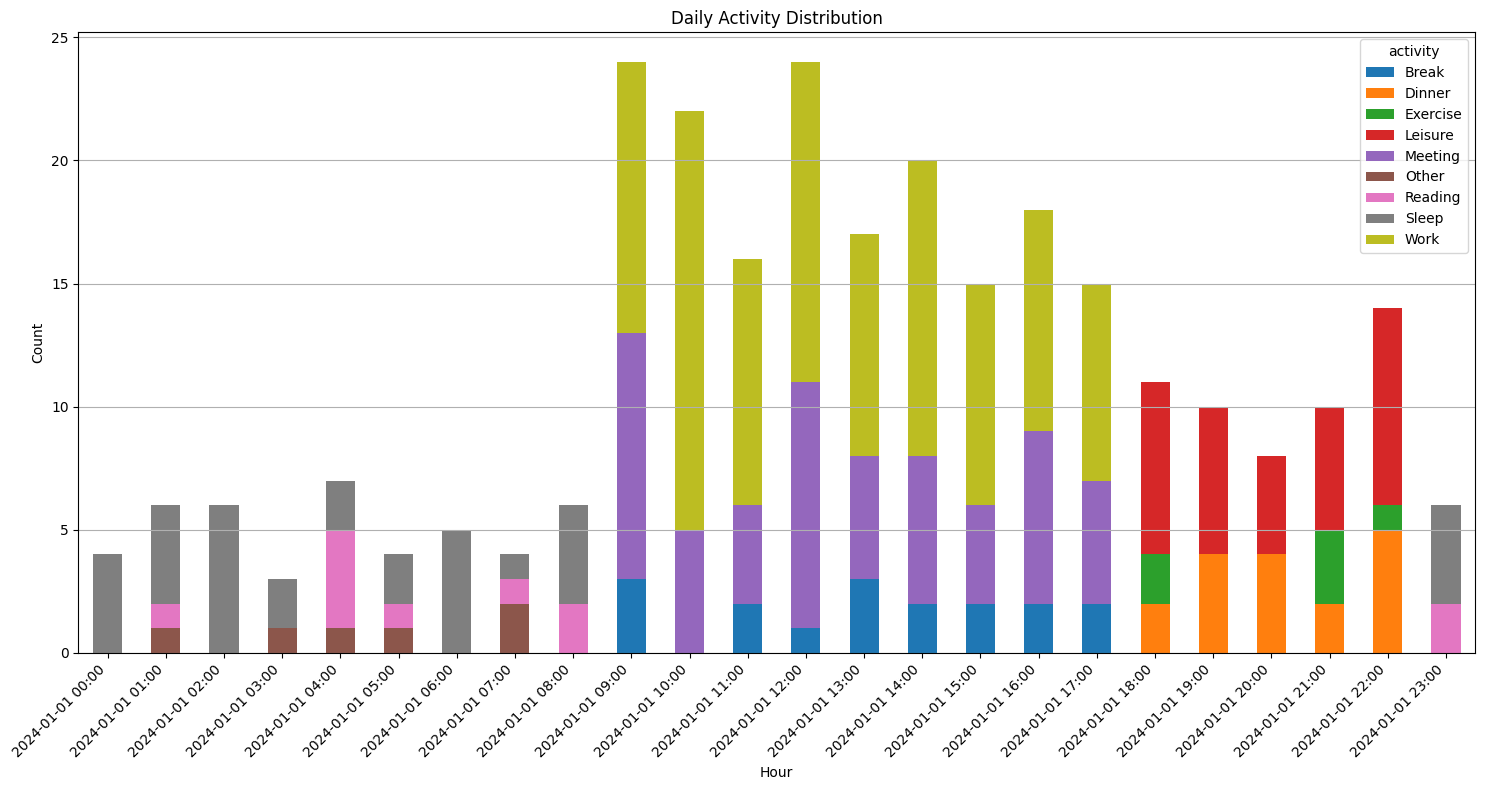

In [16]:
fig, ax = put.plot_stacked_bar_over_time(
    data = df,
    x = 'timestamp',
    y='activity',
    freq='h',
    title='Daily Activity Distribution',
    is_pct=False,
    figsize = (15,8)
)


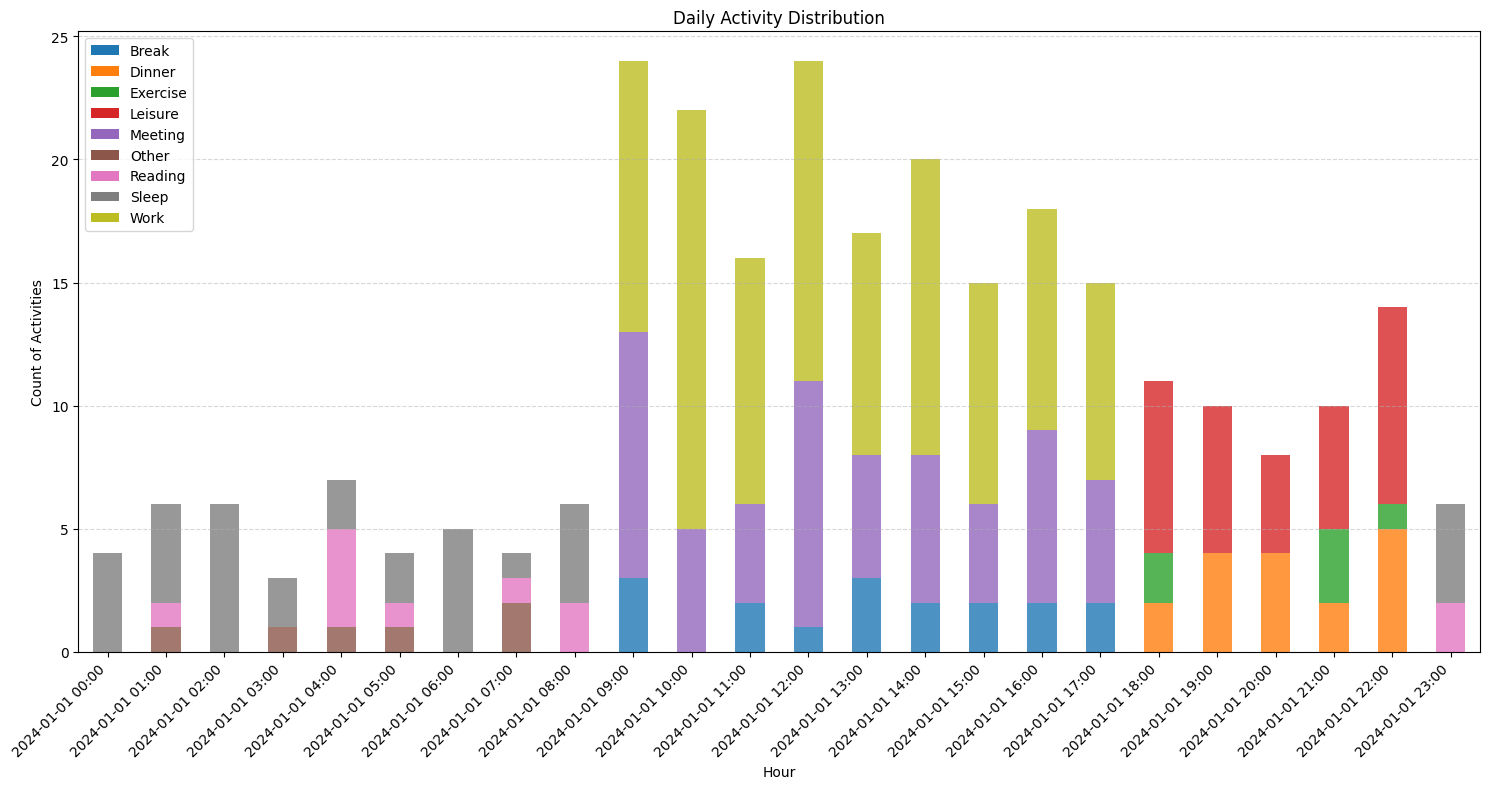

In [17]:
fig, ax = put.plot_stacked_bar_over_time(
    data = df,
    x = 'timestamp',
    y='activity',
    freq='h',
    title='Daily Activity Distribution',
    is_pct=False,
    figsize = (15,8)
)
# cutsomize to our hearts content :) 
ax.legend(loc='upper left')
ax.set_ylabel('Count of Activities')
ax.grid(True, axis="y", linestyle='--', alpha=0.5)
for container in ax.containers:
    for bar in container:
        bar.set_alpha(0.8)  

plt.tight_layout()

# 4. plot_distribution_over_time()

The `plot_distribution_over_time()` function visualizes how a continuous variable's distribution changes over time. 
It creates boxplots with optional scatter overlay to show both central tendency and dispersion.

Key features:
- Supports flexible time frequencies (minutes to years) with automatic formatting
- Allows coloring points by category with the `point_hue` parameter
- Ensures chronological ordering for accurate trend visualization
- Provides optional summary statistics (count, mean, median, std)
- Customizable appearance with various styling parameters


In [18]:
# Create datetime range from 6am to 10pm
date = '2025-03-15'
start_time = pd.Timestamp(f'{date} 06:00:00')
end_time = pd.Timestamp(f'{date} 22:00:00')
time_range = pd.date_range(start=start_time, end=end_time, freq='h')

# Define activity patterns with different heart rate distributions
activity_patterns = {
    'morning': {
        'hours': (6, 9),
        'activities': ['Walking', 'Running', 'Cycling', 'Resting'],
        'probs': [0.3, 0.2, 0.2, 0.3],
        'heart_rate_params': {
            'Walking': {'loc': 85, 'scale': 5},
            'Running': {'loc': 140, 'scale': 10},
            'Cycling': {'loc': 120, 'scale': 8},
            'Resting': {'loc': 70, 'scale': 4}
        }
    },
    'work': {
        'hours': (10, 17),
        'activities': ['Walking', 'Running', 'Cycling', 'Resting'],
        'probs': [0.4, 0.1, 0.1, 0.4],
        'heart_rate_params': {
            'Walking': {'loc': 80, 'scale': 5},
            'Running': {'loc': 130, 'scale': 10},
            'Cycling': {'loc': 110, 'scale': 8},
            'Resting': {'loc': 65, 'scale': 4}
        }
    },
    'evening': {
        'hours': (18, 22),
        'activities': ['Walking', 'Running', 'Cycling', 'Resting'],
        'probs': [0.3, 0.2, 0.2, 0.3],
        'heart_rate_params': {
            'Walking': {'loc': 90, 'scale': 5},
            'Running': {'loc': 145, 'scale': 10},
            'Cycling': {'loc': 125, 'scale': 8},
            'Resting': {'loc': 75, 'scale': 4}
        }
    }
}

# Generate data
all_timestamps = []
all_activities = []
all_heart_rates = []

for hour in time_range:
    current_hour = hour.hour
    
    # Determine pattern based on hour
    pattern = next(
        (p for p in activity_patterns.values() 
         if p['hours'][0] <= current_hour <= p['hours'][1]),
        activity_patterns['morning']  # default to morning pattern
    )
    
    # Generate 10-20 data points for this hour
    n_points = np.random.randint(10, 21)
    
    # Generate activities and heart rates
    activities = np.random.choice(
        pattern['activities'],
        size=n_points,
        p=pattern['probs']
    )
    
    heart_rates = []
    for activity in activities:
        params = pattern['heart_rate_params'][activity]
        heart_rate = np.random.normal(
            loc=params['loc'],
            scale=params['scale']
        )
        # Add some random noise
        heart_rate += np.random.normal(0, 2)
        # Ensure heart rate is within reasonable bounds
        heart_rate = np.clip(heart_rate, 40, 200)
        heart_rates.append(heart_rate)
    
    all_timestamps.extend([hour] * n_points)
    all_activities.extend(activities)
    all_heart_rates.extend(heart_rates)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': all_timestamps,
    'activity': all_activities,
    'heart_rate': all_heart_rates,
    'alert': np.random.choice(['Yes', 'No'], p=[0.1, 0.9], size=len(all_timestamps))
})

df['heart_rate'] = df['heart_rate'].round(0)

print(f"Generated {len(df)} data points from {start_time} to {end_time}")
print("\nFirst few rows of data:")
print(df.head())


Generated 236 data points from 2025-03-15 06:00:00 to 2025-03-15 22:00:00

First few rows of data:
            timestamp activity  heart_rate alert
0 2025-03-15 06:00:00  Running       131.0    No
1 2025-03-15 06:00:00  Resting        71.0    No
2 2025-03-15 06:00:00  Running       140.0    No
3 2025-03-15 06:00:00  Resting        67.0   Yes
4 2025-03-15 06:00:00  Walking        87.0    No


In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['time_period'] = df['timestamp'].dt.to_period('h')
print("Number of unique time periods:", len(df['time_period'].unique()))

Number of unique time periods: 17


## 4.1 Single color time series

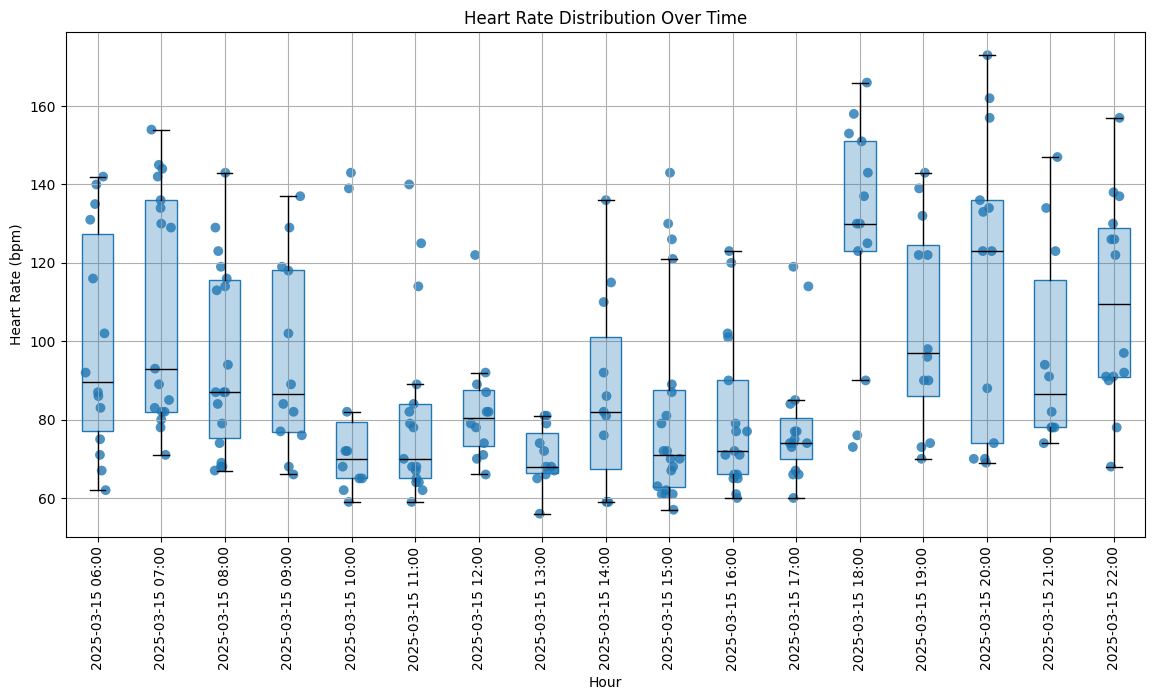

In [20]:
fig, ax = put.plot_distribution_over_time(
    data=df,
    x='timestamp',
    y='heart_rate',
    freq='h',  # hourly data
    title='Heart Rate Distribution Over Time',
    xlabel='Hour',
    ylabel='Heart Rate (bpm)',
    box_alpha=0.3,
    point_size=50,
    point_alpha=0.8,
    jitter=0.08
)

## 4.2 Color with `point_hue`

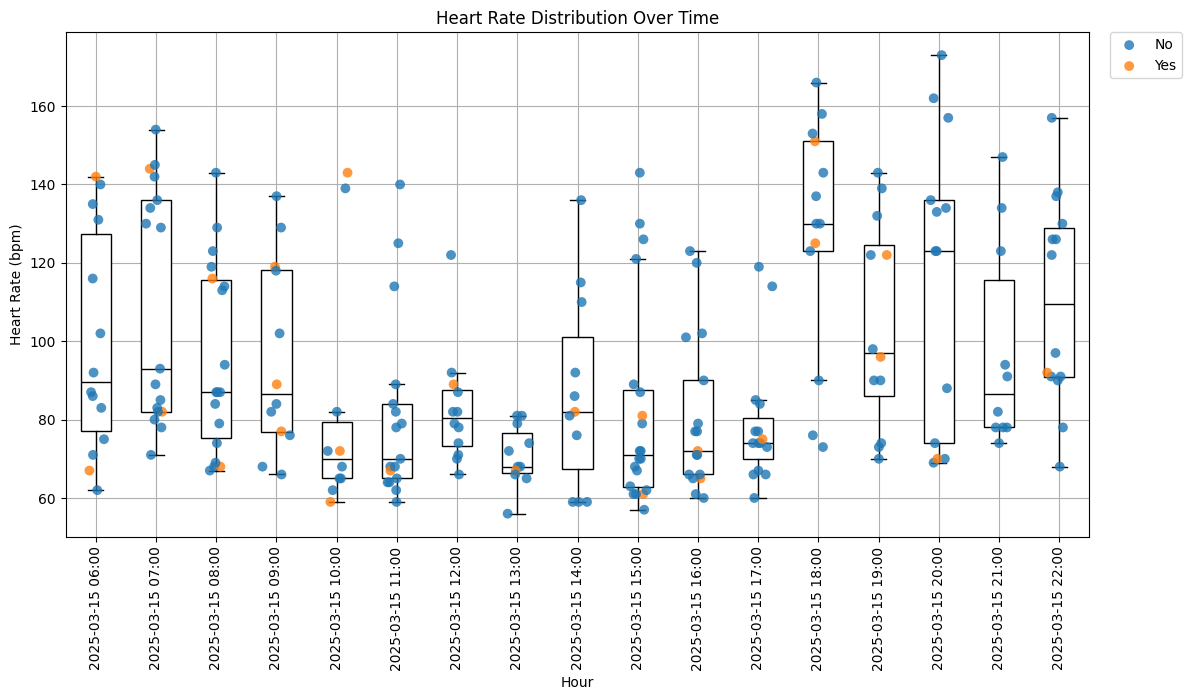

In [21]:
fig, ax = put.plot_distribution_over_time(
    data=df,
    x='timestamp',
    y='heart_rate',
    point_hue='alert',
    freq='h',  # hourly data
    title='Heart Rate Distribution Over Time',
    xlabel='Hour',
    ylabel='Heart Rate (bpm)',
    box_alpha=0.3,
    point_size=50,
    point_alpha=0.8,
    jitter=0.08
)